In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [45]:
df=pd.read_csv('data/finalTrain.csv')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [47]:
df=df.drop(labels=['ID'],axis=1)

In [48]:
cat_columns=df.columns[df.dtypes=='object']
num_columns=df.columns[df.dtypes!='object']
print('numerical_cols =',num_columns)
print('\n categorical_cols =',cat_columns)

numerical_cols = Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Vehicle_condition',
       'multiple_deliveries', 'Time_taken (min)'],
      dtype='object')

 categorical_cols = Index(['Delivery_person_ID', 'Order_Date', 'Time_Orderd', 'Time_Order_picked',
       'Weather_conditions', 'Road_traffic_density', 'Type_of_order',
       'Type_of_vehicle', 'Festival', 'City'],
      dtype='object')


In [49]:
df[cat_columns].describe()

,Delivery_person_ID,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City
count,45584,45584,43853,45584,44968,44983,45584,45584,45356,44384
unique,1320,44,176,193,6,4,4,4,2,3
top,JAPRES11DEL02,15-03-2022,21:55,21:30,Fog,Low,Snack,motorcycle,No,Metropolitian
freq,67,1192,461,495,7653,15476,11530,26429,44460,34087


In [50]:
df['Road_traffic_density'].value_counts()

Road_traffic_density
Low       15476
Jam       14139
Medium    10945
High       4423
Name: count, dtype: int64

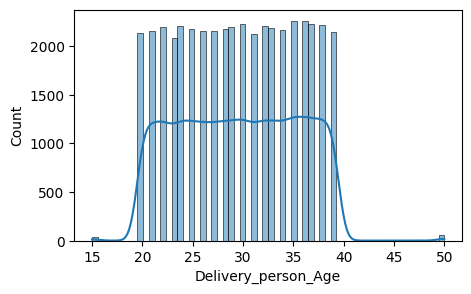

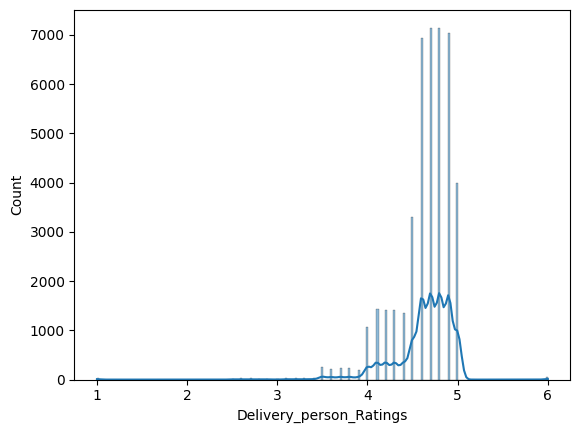

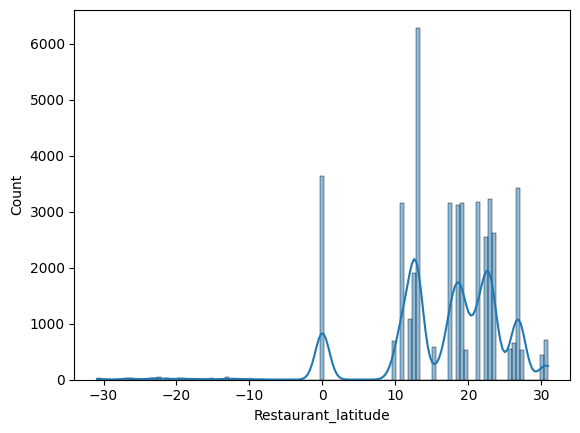

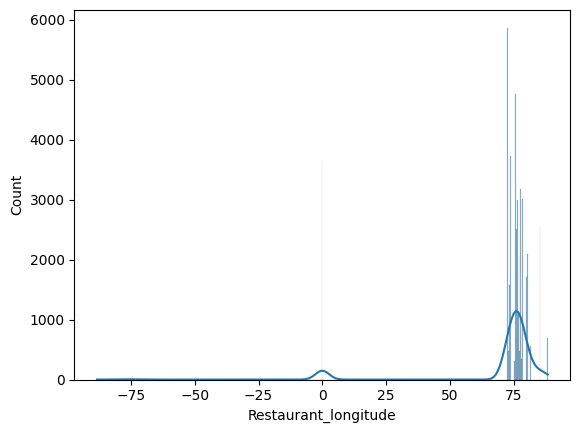

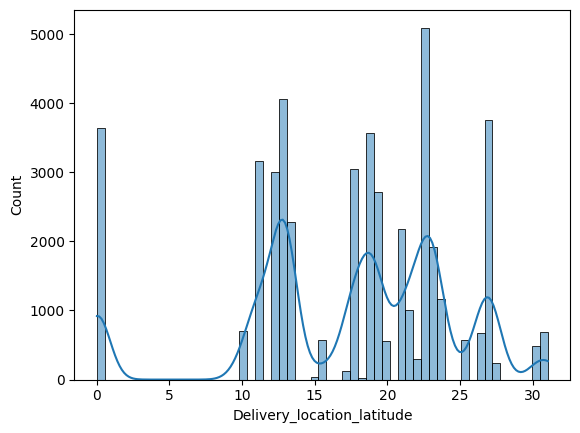

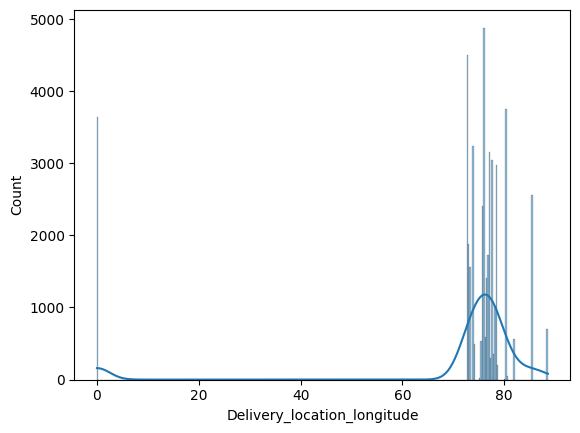

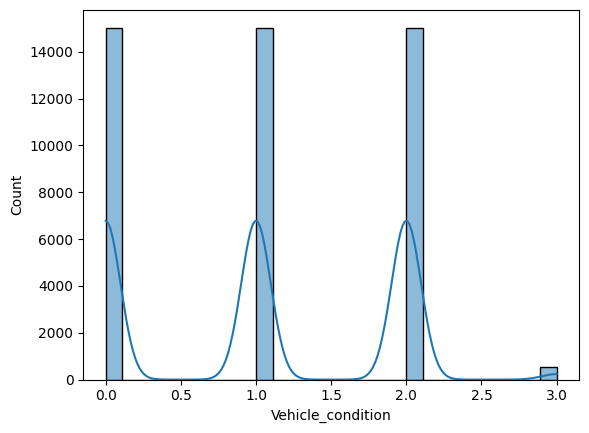

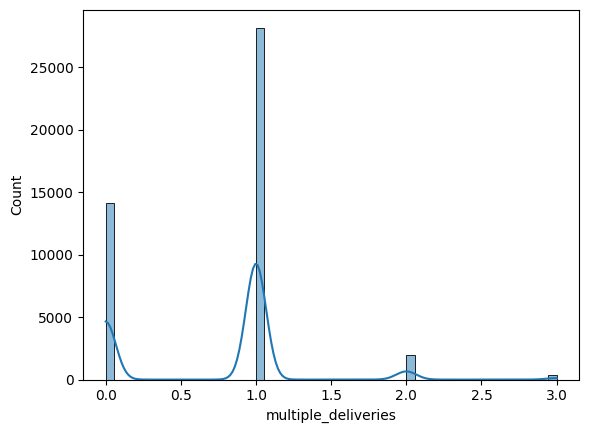

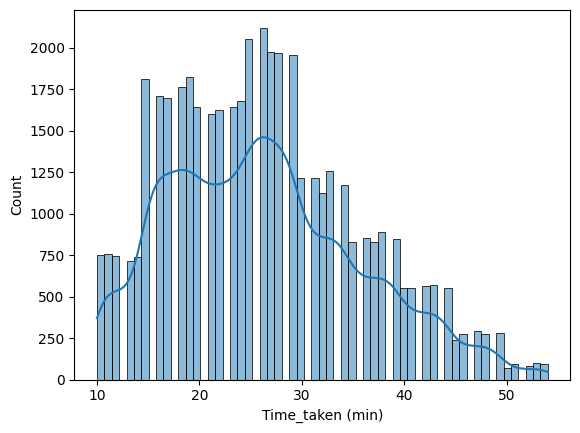

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
x=0
for i in num_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()
    

In [52]:
df

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35,11:45,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32
45580,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55,20:10,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36
45581,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50,24:05:00,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16
45582,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35,13:40,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26


<Axes: >

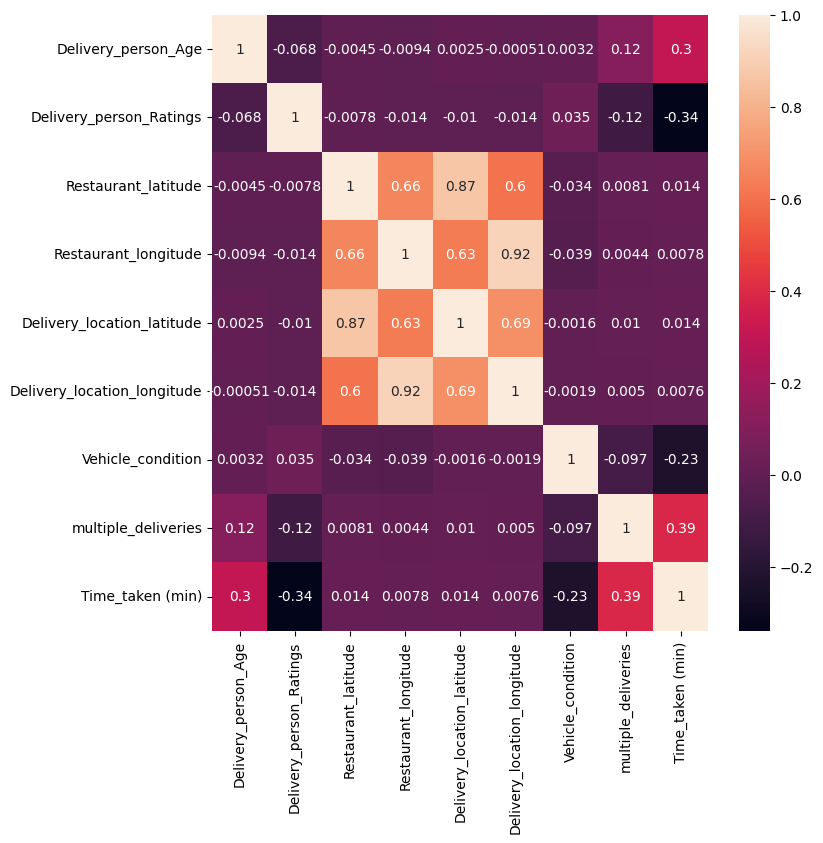

In [53]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [39]:
df

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35,11:45,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32
45580,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55,20:10,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36
45581,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50,24:05:00,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16
45582,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35,13:40,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26


In [40]:
['Delivery_person_ID', 'Order_Date', 'Time_Orderd', 'Time_Order_picked',
       'Weather_conditions', 'Road_traffic_density', 'Type_of_order',
       'Type_of_vehicle', 'Festival', 'City']

['Delivery_person_ID',
 'Order_Date',
 'Time_Orderd',
 'Time_Order_picked',
 'Weather_conditions',
 'Road_traffic_density',
 'Type_of_order',
 'Type_of_vehicle',
 'Festival',
 'City']

In [44]:
Weather_conditions_map={"Sunny":1,"Stormy":2,"Sandstorms":3,"Windy":4,"Fog":5, "Cloudy":6}
Road_traffic_density_map={"Low":1,"Medium":2,"High":3,"Jam":4}
Type_of_order_map={"Drinks":1, "Buffet":2, "Snack":3, "Meal":4}
Type_of_vehicle_map={"electric_scooter":1, "scooter":2,"bicycle":3, "motorcycle":4}
Festival_map={"No":1,"Yes":2}
City_map={"Urban":1,"Metropolitian":2,"Semi-Urban":3}

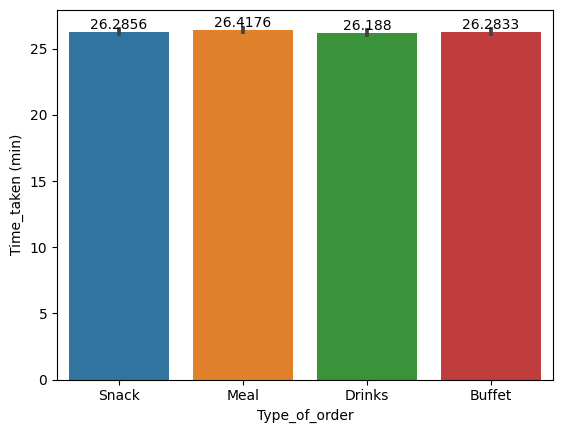

In [141]:
ax=sns.barplot(x='Type_of_order',y='Time_taken (min)',data=df)

for i in ax.containers:
    ax.bar_label(i,)

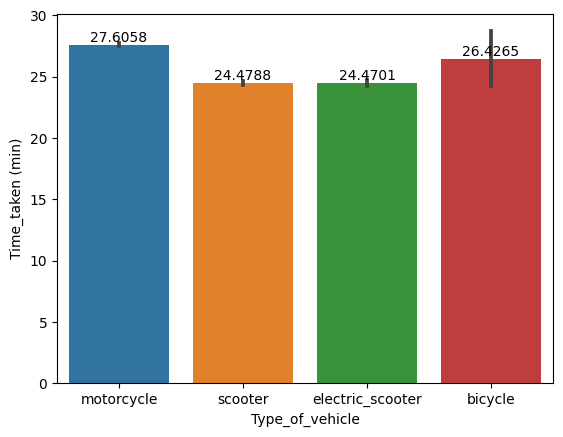

In [143]:
ax=sns.barplot(x='Type_of_vehicle',y='Time_taken (min)',data=df)

for i in ax.containers:
    ax.bar_label(i,)

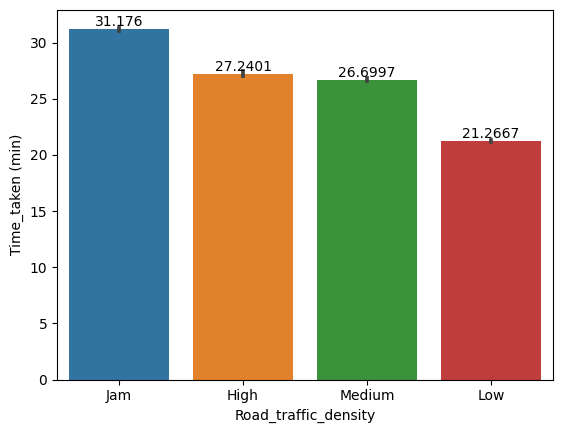

In [145]:

ax=sns.barplot(x='Road_traffic_density',y='Time_taken (min)',data=df)

for i in ax.containers:
    ax.bar_label(i,)

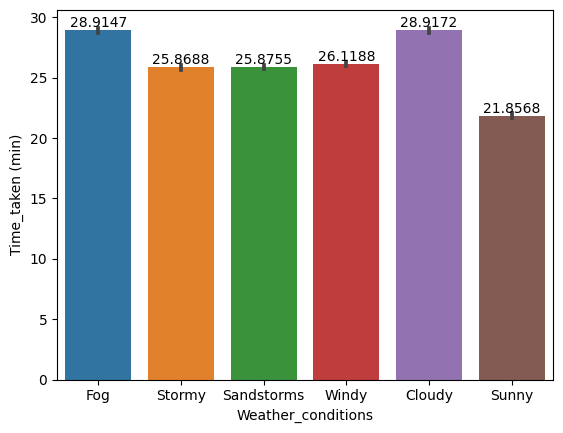

In [147]:

ax=sns.barplot(x='Weather_conditions',y='Time_taken (min)',data=df)

for i in ax.containers:
    ax.bar_label(i,)

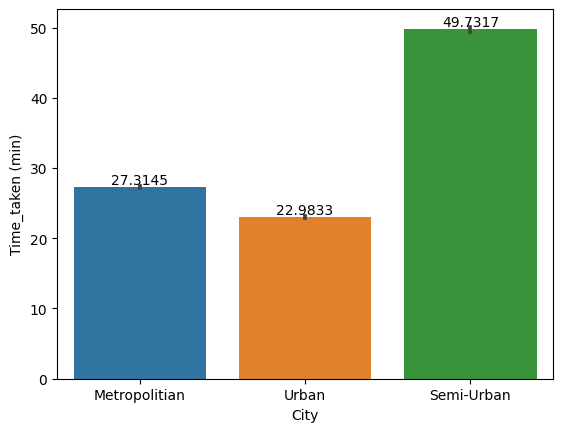

In [148]:
ax=sns.barplot(x='City',y='Time_taken (min)',data=df)

for i in ax.containers:
    ax.bar_label(i,)

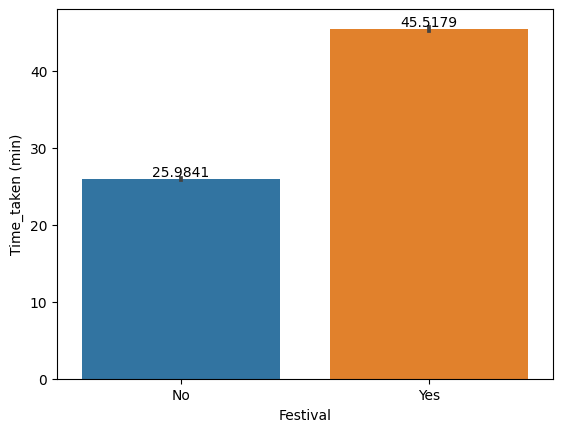

In [150]:
ax=sns.barplot(x='Festival',y='Time_taken (min)',data=df)

for i in ax.containers:
    ax.bar_label(i,)

In [90]:
df['Order_Date_Day']=pd.to_datetime(df['Order_Date'],dayfirst=True).dt.day
df['Order_Date_Month']=pd.to_datetime(df['Order_Date'],dayfirst=True).dt.month
df['Order_Date_Year']=pd.to_datetime(df['Order_Date'],dayfirst=True).dt.year

In [102]:
df['Festival']=df['Festival'].map({'Yes':1,'No':0})

In [49]:
df['City'].value_counts()

City
Metropolitian    34087
Urban            10133
Semi-Urban         164
Name: count, dtype: int64

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Vehicle_condition',
       'multiple_deliveries', 'Time_taken (min)'],
      dtype='object')